In [1]:
#Laos Small Group Project

#This python script models the Laotian power network in 2050 following the Net-Zero Scenario data proposed by the team. The domestic network
#is simplified into 4 regions (North, Central 1, Central 2, South), and generation is distributed along them according to previously identified
#renewable energy potential and land constraints.

#Domestic demand in 2050 is distributed across the 4 regions proportionally to population
#Export demand is based on export commitments to Thailand, Vietnam, China, Myanmar, and Cambodia and following existing infrastructures

#Local voltage levels are at 115kV, while exports to Vietnam and Thailand are at 230kV, with 3 transformers used to upgrade voltage levels

#All input parameters are available in the excel sheet "laos Python Model Inputs" also available in the same GitHub folder

In [2]:
# Import libraries
import pandas as pd
import pandapower as pp
from pandapower.plotting.plotly import simple_plotly
import pandapower.plotting as plot


In [3]:
# Create network
net = pp.create_empty_network() 


In [4]:
#Read bus data from excel
bus_df=pd.read_csv('buses.csv',nrows=15)
#bus_df

In [5]:
# Create buses
b = {}

for i in bus_df['bus_id']:
  b[i] = pp.create_bus(net, vn_kv = bus_df.loc[bus_df['bus_id']==i, 'vn_kv'].values[0], name = bus_df.loc[bus_df['bus_id']==i, 'name'].values[0], geodata = eval(bus_df.loc[bus_df['bus_id']==i, 'geodata'].values[0]),min_vm_pu=0.85)
net.bus

,name,vn_kv,type,zone,in_service,min_vm_pu
0,North,115.0,b,None,True,0.85
1,Central 1,115.0,b,None,True,0.85
2,Central 2,115.0,b,None,True,0.85
3,South,115.0,b,None,True,0.85
4,Thailand_north,230.0,b,None,True,0.85
5,Thailand_central1,230.0,b,None,True,0.85
6,Thailand_central2,115.0,b,None,True,0.85
7,Thailand_south,115.0,b,None,True,0.85
8,Vietnam,230.0,b,None,True,0.85
9,Cambodia,115.0,b,None,True,0.85


In [6]:
# Create one grid connection point
connect_bus = b[12] 
vm_pu = 1.1

# Create the external grid connection
pp.create_ext_grid(net, bus=connect_bus, vm_pu=vm_pu, name = "Slack bus")

0

In [7]:
# Import line data from excel file-- from_bus, to_bus, length_km, r_ohm_per_km, x_ohm_per_km, c_nf_per_km, max_i_ka

line_df = pd.read_csv('lines.csv',nrows=15)
#line_df

ValueError: Excel file format cannot be determined, you must specify an engine manually.

In [ ]:
# Create lines
for i in line_df.index:
  pp.create_line_from_parameters(net, from_bus=b[line_df.loc[i, 'from_bus']],
                                 to_bus=b[line_df.loc[i, 'to_bus']],
                                 length_km=line_df.loc[i, 'length_km'],
                                 r_ohm_per_km=line_df.loc[i, 'r_ohm_per_km'],
                                 x_ohm_per_km=line_df.loc[i, 'x_ohm_per_km'],
                                 c_nf_per_km=line_df.loc[i, 'c_nf_per_km'],
                                 max_i_ka=line_df.loc[i, 'max_i_ka']
                                 ) 
net.line

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service
0,None,None,0,1,200.0,0.01,0.01,1.000000e-09,0.0,20.0,1.0,1,None,True
1,None,None,1,2,370.0,0.01,0.01,1.000000e-09,0.0,10.0,1.0,1,None,True
2,None,None,2,3,150.0,0.01,0.01,1.000000e-09,0.0,10.0,1.0,1,None,True
3,None,None,12,4,310.0,0.01,0.01,1.000000e-09,0.0,15.0,1.0,1,None,True
4,None,None,13,5,200.0,0.01,0.01,1.000000e-09,0.0,20.0,1.0,1,None,True
5,None,None,2,6,200.0,0.01,0.01,1.000000e-09,0.0,10.0,1.0,1,None,True
6,None,None,3,7,200.0,0.01,0.01,1.000000e-09,0.0,10.0,1.0,1,None,True
7,None,None,0,10,90.0,0.01,0.01,1.000000e-09,0.0,10.0,1.0,1,None,True
8,None,None,0,11,50.0,0.01,0.01,1.000000e-09,0.0,20.0,1.0,1,None,True
9,None,None,14,8,70.0,0.01,0.01,1.000000e-09,0.0,30.0,1.0,1,None,True


In [ ]:
# Import Load data from excel-- geolocation, bus (nearest from geolocation), p_mw
load_df = pd.read_excel('LaosModelInputs.xlsx', sheet_name='loads',nrows=12)
#load_df

In [ ]:
# Create loads
p_mw = 'power_p_mw'
q_mvar = 'power_q_mvar'

for i in load_df['bus_id']:
  pp.create_load(net, 
                 b[i], 
                 p_mw=load_df.loc[load_df['bus_id']==i, p_mw].values[0], 
                 q_mvar=load_df.loc[load_df['bus_id']==i, q_mvar].values[0],
                 name=load_df.loc[load_df['bus_id']==i, 'name'].values[0])

In [ ]:
net.load

,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type
0,North,0,874.885904,423.726583,0.0,0.0,NaN,1.0,True,wye
1,Central 1,1,983.542553,476.351400,0.0,0.0,NaN,1.0,True,wye
2,Central 2,2,865.135514,419.004253,0.0,0.0,NaN,1.0,True,wye
3,South,3,710.776028,344.244542,0.0,0.0,NaN,1.0,True,wye
4,Thailand_north,4,2250.000000,1089.724736,0.0,0.0,NaN,1.0,True,wye
5,Thailand_central1,5,2250.000000,1089.724736,0.0,0.0,NaN,1.0,True,wye
6,Thailand_central2,6,2250.000000,1089.724736,0.0,0.0,NaN,1.0,True,wye
7,Thailand_south,7,2250.000000,1089.724736,0.0,0.0,NaN,1.0,True,wye
8,Vietnam,8,5000.000000,2421.610524,0.0,0.0,NaN,1.0,True,wye
9,Cambodia,9,1500.000000,726.483157,0.0,0.0,NaN,1.0,True,wye


In [ ]:
# Generators imported from excel
vm_pu=1.1

gen_df = pd.read_excel('LaosModelInputs.xlsx', sheet_name='gen',nrows=4)
#gen_df    

In [ ]:
#Generators
for i in gen_df['gen_id']:
  pp.create_gen(net, bus=gen_df.loc[gen_df['gen_id']==i, 'bus_id'].values[0],
                 p_mw=gen_df.loc[gen_df['gen_id']==i, 'p_mw'].values[0],vm_pu=1, 
                 name=gen_df.loc[gen_df['gen_id']==i, 'name'].values[0])
net.gen


,name,bus,p_mw,vm_pu,sn_mva,min_q_mvar,max_q_mvar,scaling,slack,in_service,slack_weight,type
0,North,0,6873.646450,1.0,NaN,NaN,NaN,1.0,False,True,0.0,None
1,Central 1,1,7843.452434,1.0,NaN,NaN,NaN,1.0,False,True,0.0,None
2,Central 2,2,6273.251055,1.0,NaN,NaN,NaN,1.0,False,True,0.0,None
3,South,3,10782.577312,1.0,NaN,NaN,NaN,1.0,False,True,0.0,None


In [ ]:
#Storage entries are added manually

pp.create_storage(net,0, p_mw=1348.76, max_e_mwh=25000) #North
pp.create_storage(net,1, p_mw=4609.91, max_e_mwh=25000) #Central 1
pp.create_storage(net,2, p_mw=3158.12, max_e_mwh=25000) #Central 2
#pp.create_storage(net,3, p_mw=600, max_e_mwh=25000) #South

2

In [ ]:
# Create the transformers

# First Transformer
#North (115) to Thailand_north (230)
lv_bus = net.bus[net.bus.name == 'North'].index.values[0]
hv_bus = net.bus[net.bus.name == 'trafo_b0'].index.values[0]

# Parameters assumed equal to those of the 100 MVA 220/110 kV standard type
sn_mva = 400
vn_hv_kv = 230
vn_lv_kv = 115
vk_percent = 12
vkr_percent = 0.26
pfe_kw = 3.2
i0_percent = 0.06
pp.create_transformer_from_parameters(net, hv_bus=hv_bus, lv_bus=lv_bus, sn_mva=sn_mva, vn_hv_kv=vn_hv_kv, vn_lv_kv=vn_lv_kv, vkr_percent=vkr_percent, vk_percent=vk_percent, pfe_kw=pfe_kw, i0_percent=i0_percent)

# Second Transformer
#Central 1 (115) to Thailand_c1 (230)
lv_bus = net.bus[net.bus.name == 'Central 1'].index.values[0]
hv_bus = net.bus[net.bus.name == 'trafo_b1'].index.values[0]


sn_mva = 4000
vn_hv_kv = 230
vn_lv_kv = 115
vk_percent = 12
vkr_percent = 0.26
pfe_kw = 3.2
i0_percent = 0.06
pp.create_transformer_from_parameters(net, hv_bus=hv_bus, lv_bus=lv_bus, sn_mva=sn_mva, vn_hv_kv=vn_hv_kv, vn_lv_kv=vn_lv_kv, vkr_percent=vkr_percent, vk_percent=vk_percent, pfe_kw=pfe_kw, i0_percent=i0_percent)

# Third Transformer
#South (115) to Vietnam (230)
lv_bus = net.bus[net.bus.name == 'South'].index.values[0]
hv_bus = net.bus[net.bus.name == 'trafo_b3'].index.values[0]

sn_mva = 40000
vn_hv_kv = 230
vn_lv_kv = 115
vk_percent = 12
vkr_percent = 0.26
pfe_kw = 3.2
i0_percent = 0.06
pp.create_transformer_from_parameters(net, hv_bus=hv_bus, lv_bus=lv_bus, sn_mva=sn_mva, vn_hv_kv=vn_hv_kv, vn_lv_kv=vn_lv_kv, vkr_percent=vkr_percent, vk_percent=vk_percent, pfe_kw=pfe_kw, i0_percent=i0_percent)

2

In [ ]:
# Run the network using the NR algorithm
pp.runpp(net, algorithm='nr', max_iteration=10000);

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



In [ ]:
net.line

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service
0,None,None,0,1,200.0,0.01,0.01,1.000000e-09,0.0,20.0,1.0,1,None,True
1,None,None,1,2,370.0,0.01,0.01,1.000000e-09,0.0,10.0,1.0,1,None,True
2,None,None,2,3,150.0,0.01,0.01,1.000000e-09,0.0,10.0,1.0,1,None,True
3,None,None,12,4,310.0,0.01,0.01,1.000000e-09,0.0,15.0,1.0,1,None,True
4,None,None,13,5,200.0,0.01,0.01,1.000000e-09,0.0,20.0,1.0,1,None,True
5,None,None,2,6,200.0,0.01,0.01,1.000000e-09,0.0,10.0,1.0,1,None,True
6,None,None,3,7,200.0,0.01,0.01,1.000000e-09,0.0,10.0,1.0,1,None,True
7,None,None,0,10,90.0,0.01,0.01,1.000000e-09,0.0,10.0,1.0,1,None,True
8,None,None,0,11,50.0,0.01,0.01,1.000000e-09,0.0,20.0,1.0,1,None,True
9,None,None,14,8,70.0,0.01,0.01,1.000000e-09,0.0,30.0,1.0,1,None,True


use_bus_geodata is automatically set to True, since net.line_geodata is empty.


<Axes: >

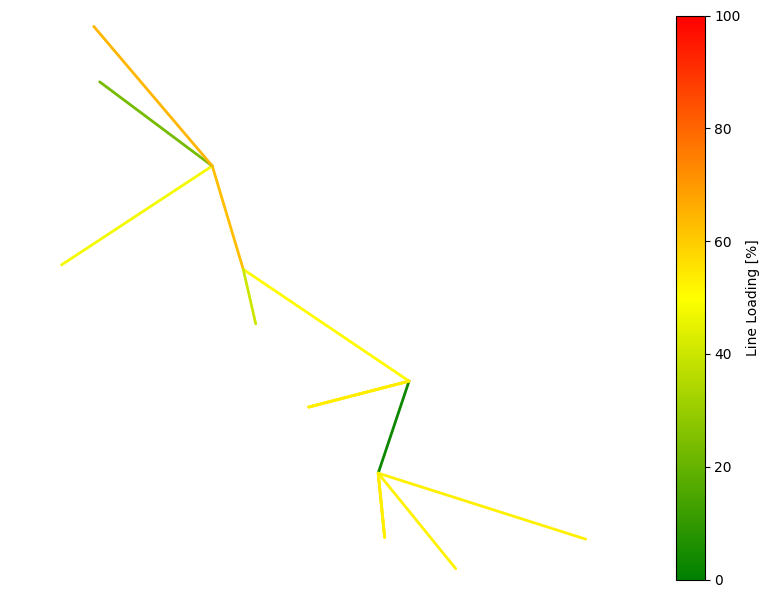

In [ ]:
cmap_list=[(0, "green"), (50, "yellow"), (100, "red")]
cmap, norm = plot.cmap_continuous(cmap_list)

lc = plot.create_line_collection(net, net.line.index, zorder=1, cmap=cmap, norm=norm, linewidths=2)
plot.draw_collections([lc], figsize=(8,6))

<Axes: >

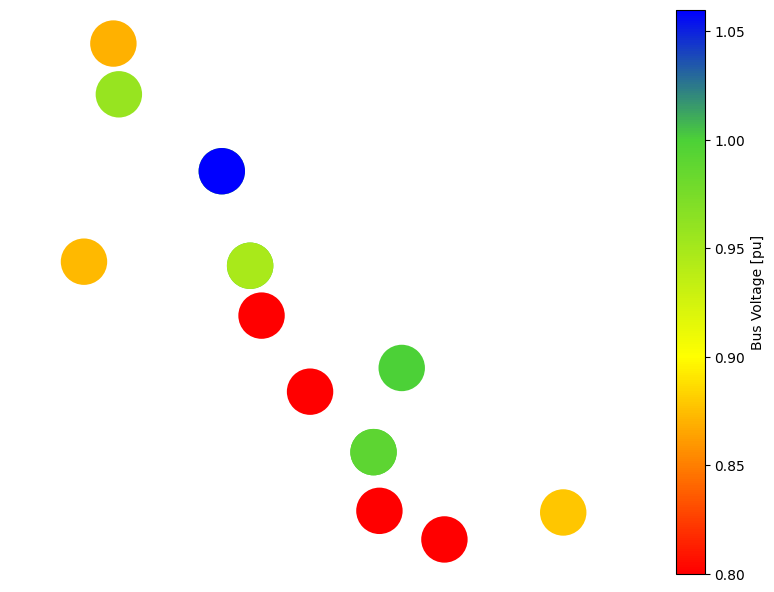

In [ ]:
ideal_color = "#4cd137"
too_high_color = "blue"
too_low_color = "yellow"
very_low_color = "red"
cmap_list=[(0.8, very_low_color), (0.9, too_low_color), (1.0, ideal_color), (1.06, too_high_color)] #+6 and -10 percent for voltage regulations
cmap, norm = plot.cmap_continuous(cmap_list)
bc = plot.create_bus_collection(net, net.bus.index, size=0.4, zorder=2, cmap=cmap, norm=norm)
plot.draw_collections([bc], figsize=(8,6))

<Axes: >

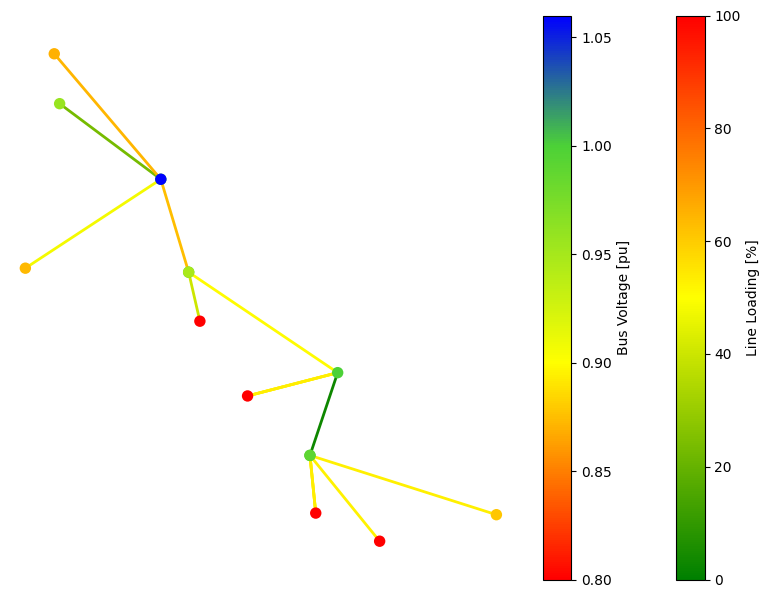

In [ ]:
ideal_color = "#4cd137"
too_high_color = "blue"
too_low_color = "red"
cmap_list=[(0.8,"red"),(0.9, "yellow"), (1.0, ideal_color), (1.06, too_high_color)] #+6 and -10 percent for voltage regulations
cmap, norm = plot.cmap_continuous(cmap_list)
bc = plot.create_bus_collection(net, net.bus.index, size=0.1, zorder=2, cmap=cmap, norm=norm)
plot.draw_collections([lc,bc], figsize=(8,6))

The number of given colors (3) is larger than the number of nodes (0) to draw! The colors will be capped to fit.


<Axes: >

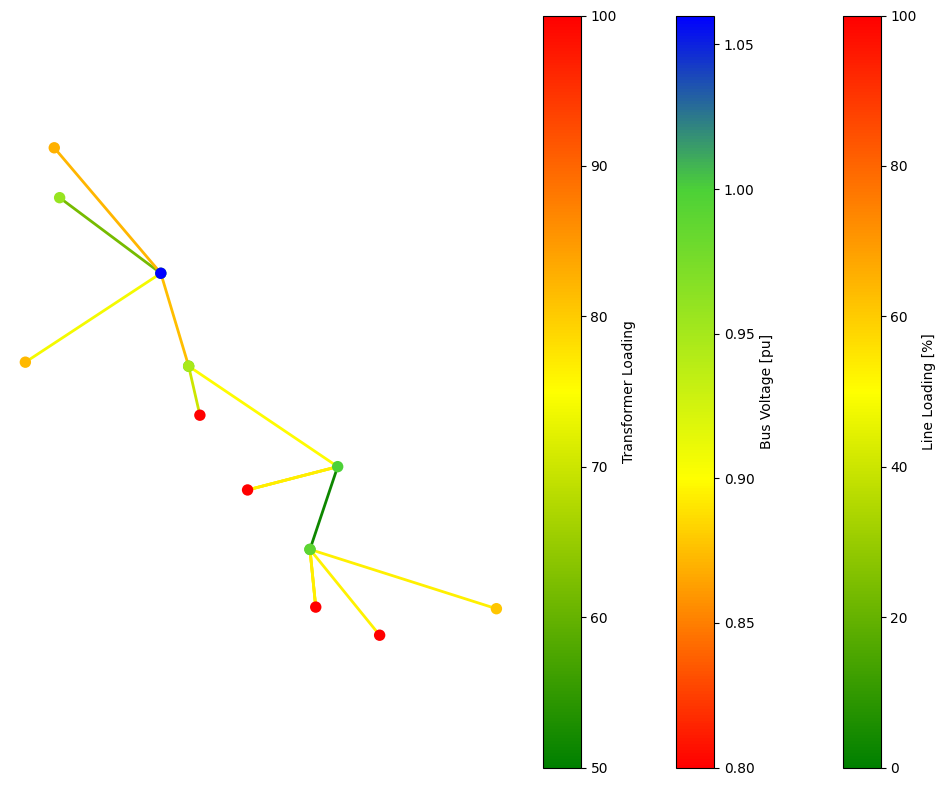

In [ ]:
cmap_list=[(50, "green"), (75, "yellow"), (100, "red")]
cmap, norm = plot.cmap_continuous(cmap_list)
tc = pp.plotting.create_trafo_collection(net, net.trafo.index, cmap=cmap, norm=norm)
plot.draw_collections([lc,bc, tc])

In [ ]:
# Print the elements of the network
net

This pandapower network includes the following parameter tables:
   - bus (15 element)
   - load (12 element)
   - storage (3 element)
   - gen (4 element)
   - ext_grid (1 elements)
   - line (15 element)
   - trafo (3 element)
   - bus_geodata (15 element)
 and the following results tables:
   - res_bus (15 element)
   - res_line (15 element)
   - res_trafo (3 element)
   - res_ext_grid (1 elements)
   - res_load (12 element)
   - res_storage (3 element)
   - res_gen (4 element)

In [ ]:
# Display line results
net.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,2169.333214,-1229.166006,-1229.166006,2169.333214,940.167208,940.167208,12.517769,12.517769,12.517769,1.000000,-2.713334,1.000000,-33.640680,62.588844
1,839.994318,-556.077105,-556.077105,839.994318,283.917213,283.917213,5.057482,5.057482,5.057482,1.000000,-33.640680,1.000000,-56.631479,50.574823
2,40.707334,-40.334859,-40.334859,40.707334,0.372475,0.372475,0.287702,0.287702,0.287702,1.000000,-56.631479,1.000000,-57.158146,2.877016
3,2730.486799,1570.211535,-2250.000000,-1089.724736,480.486799,480.486799,7.187854,7.187854,7.187854,1.100000,0.000000,0.873076,-4.059833,47.919028
4,2632.588347,1472.313083,-2250.000000,-1089.724736,382.588347,382.588347,7.985282,7.985282,7.985282,0.948199,-38.359402,0.785889,-41.734203,39.926409
5,921.788437,535.030016,-750.000000,-363.241579,171.788437,171.788437,5.350832,5.350832,5.350832,1.000000,-56.631479,0.781878,-60.921542,53.508323
6,921.788437,535.030016,-750.000000,-363.241579,171.788437,171.788437,5.350832,5.350832,5.350832,1.000000,-57.158146,0.781878,-61.448208,53.508323
7,414.656153,208.384995,-400.000000,-193.728842,14.656153,14.656153,2.329851,2.329851,2.329851,1.000000,-2.713334,0.957703,-3.553166,23.298508
8,2246.674774,1215.318984,-2000.000000,-968.644210,246.674774,246.674774,12.823800,12.823800,12.823800,1.000000,-2.713334,0.869986,-5.282183,64.119001
9,5529.917492,2951.528016,-5000.000000,-2421.610524,529.917492,529.917492,15.885266,15.885266,15.885266,0.990527,-58.106452,0.877899,-60.355062,52.950885


In [ ]:
# Display bus results
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.000000,-2.713334,-4650.000545,130.720638
1,1.000000,-33.640680,-2249.999881,-3391.472368
2,1.000000,-56.631479,-2249.995541,-2404.749506
3,1.000000,-57.158146,-10071.801284,-5782.151038
4,0.873076,-4.059833,2250.000000,1089.724736
5,0.785889,-41.734203,2250.000000,1089.724736
6,0.781878,-60.921542,2250.000000,1089.724736
7,0.781878,-61.448208,2250.000000,1089.724736
8,0.877899,-60.355062,5000.000000,2421.610524
9,0.796857,-61.156604,1500.000000,726.483157


In [ ]:
# Display generator results
net.res_gen

,p_mw,q_mvar,va_degree,vm_pu
0,6873.646450,293.005944,-2.713334,1.0
1,7843.452434,3867.823767,-33.640680,1.0
2,6273.251055,2823.753759,-56.631479,1.0
3,10782.577312,6126.395580,-57.158146,1.0


In [ ]:
#Display transformer results
net.res_trafo

,p_hv_mw,q_hv_mvar,p_lv_mw,q_lv_mvar,pl_mw,ql_mvar,i_hv_ka,i_lv_ka,vm_hv_pu,va_hv_degree,vm_lv_pu,va_lv_degree,loading_percent
0,181.567476,367.068120,-180.663596,-325.258611,0.903881,41.809508,0.934529,1.867930,1.100000,0.000000,1.0,-2.713334,93.072484
1,-2632.588347,-1472.313083,2639.171569,1778.216259,6.583222,305.903176,7.985282,15.976731,0.948199,-38.359402,1.0,-33.640680,79.558468
2,-5529.917492,-2951.528016,5532.528409,3095.628077,2.610918,144.100061,15.885266,31.828060,0.990527,-58.106452,1.0,-57.158146,15.849248


use_bus_geodata is automatically set to True, since net.line_geodata is empty.


<Axes: >

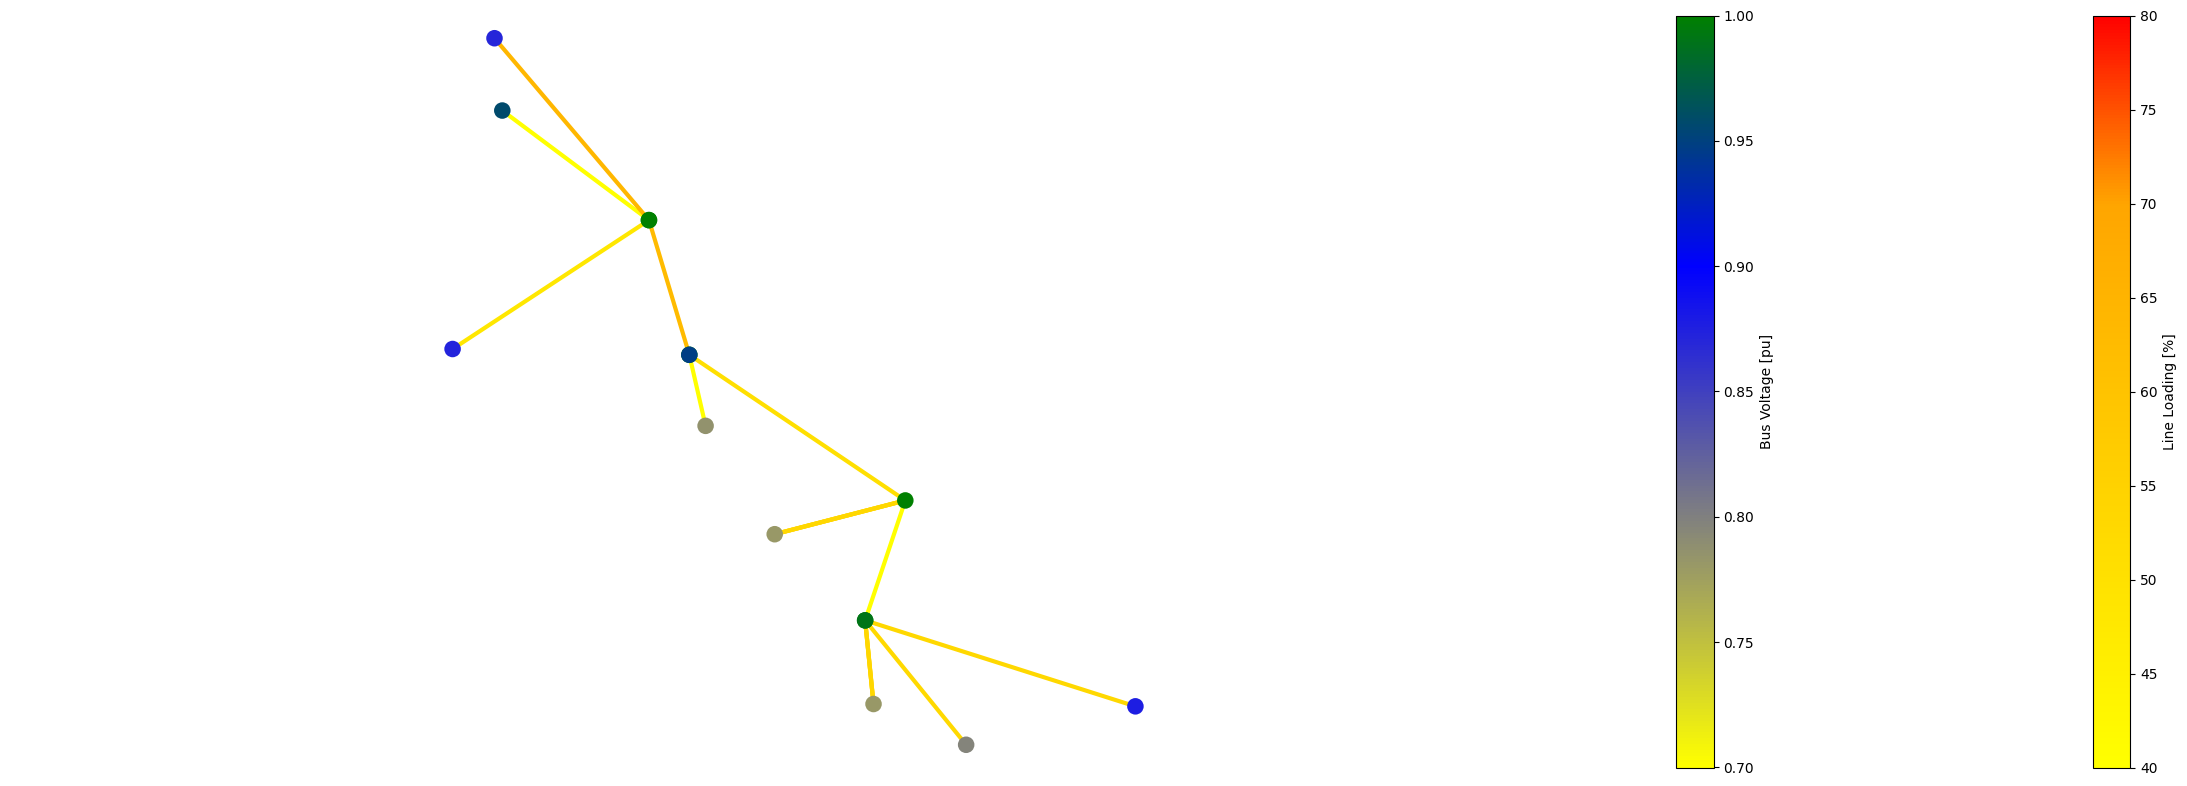

In [ ]:
# Plot an advanced visual of the network showing the line loading results and voltage drops

import pandapower.plotting as plot
import matplotlib.pyplot as plt
import seaborn

# Creating the line color collection
cmap_list=[(40, "yellow"), (70, "orange"), (80, "red")]
cmap, norm = plot.cmap_continuous(cmap_list)
lc = plot.create_line_collection(net, net.line.index, zorder=1, cmap=cmap, norm=norm, linewidths=3)

# Creating the bus color collection
cmap_list=[(0.7, "yellow"), (0.9, "blue"), (1.0, "green")]
cmap, norm = plot.cmap_continuous(cmap_list)
bc = plot.create_bus_collection(net, net.bus.index, size=0.1, zorder=2, cmap=cmap, norm=norm)

plot.draw_collections([lc, bc], figsize=(25,8))

In [ ]:
#Print results to an excel file
#pp.to_excel(net, "results.xlsx") 